# Lecture 4. CNN build
* Ref. 최건호, 파이토치 첫걸음, 한빛미디어 ([link](https://drive.google.com/drive/folders/12zphz36T6gEJac6WScnvRN27-f1tfHO1))

## 1. 인공신경망
* 2장의 선형회귀모델과 달리, 비선형인 2차함수에 대한 회귀모델을 딥러닝으로 구현해보자!
* y = x<sup>2</sup>+3

### 1.1. 라이브러리 및 데이터 만들기 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from matplotlib import pyplot as plt
from tqdm import tqdm

In [11]:
# GPU에서 학습을 위해 GPU check
print("사용 가능한 GPU가 존재하는가? (True or False): ", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 가능한 GPU의 수는 {} 개 입니다.".format(torch.cuda.device_count()))
    print("GPU 각각의 이름은 아래와 같습니다.")
    for i in range(torch.cuda.device_count()):
        print("GPU {}: {}".format(i, torch.cuda.get_device_name(i)))
else:
    print("사용 가능한 GPU가 존재하지 않습니다. 혹은 GPU를 Pytorch가 찾지 못하고 있습니다.")

사용 가능한 GPU가 존재하는가? (True or False):  True
사용 가능한 GPU의 수는 4 개 입니다.
GPU 각각의 이름은 아래와 같습니다.
GPU 0: NVIDIA GeForce GTX TITAN X
GPU 1: NVIDIA GeForce GTX TITAN X
GPU 2: NVIDIA GeForce GTX TITAN X
GPU 3: NVIDIA GeForce GTX TITAN X


In [12]:
# 데이터 생성
num_data = 1000

noise = init.normal_(torch.FloatTensor(num_data,1),std=3)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise

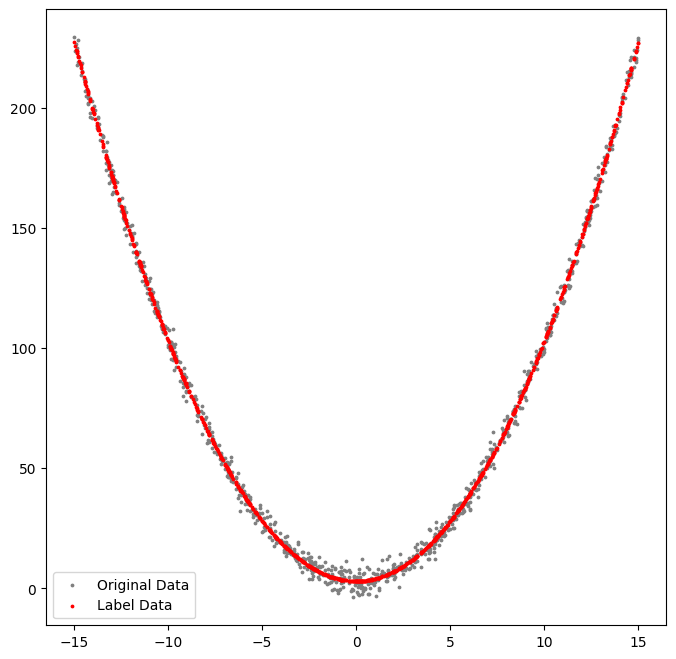

In [21]:
# 데이터 시각화
plt.figure(figsize=(8,8))
plt.scatter(x.numpy(), y_noise.numpy(), s=3, c='gray', label='Original Data') # 학습시킬 실제 데이터 분포
plt.scatter(x.numpy(), y.numpy(), s=3, c='red', label='Label Data') # 정답 분포
plt.legend()

### 1.2. 모델 생성 및 학습

In [14]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss() # 손실함수로는 L1(절대값의 평균) loss 사용
optimizer = optim.SGD(model.parameters(),lr=0.0002) # 옵티마이저로는 SGD 사용

In [15]:
num_epoch = 10000 # 학습시킬 epoch 수
device = 'cuda:0' # 학습시킬 gpu
loss_array = []
pbar = tqdm(total=num_epoch) # tqdm으로 학습 진행도 확인 가능
for i in range(num_epoch): 
    x.to(device)
    y_noise.to(device)
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    pbar.set_description(f"Processing({i+1}/{num_epoch}): loss={loss.data}")
    pbar.update(1)
    loss_array.append(loss.detach().numpy()) # 손실값의 데이터만 numpy로 보냄
pbar.close()

Processing(10000/10000): loss=3.9225454330444336: 100%|██████████| 10000/10000 [00:17<00:00, 570.83it/s]


### 1.3. 결과 확인

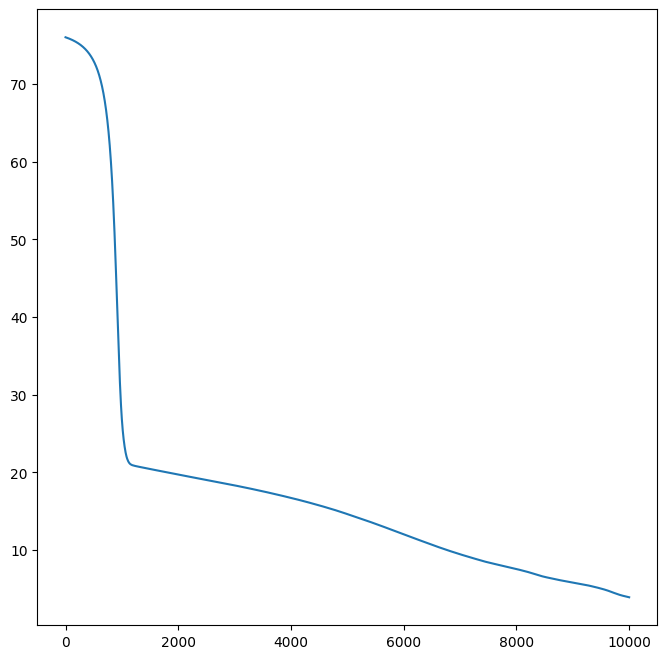

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(loss_array)
# plt.show()

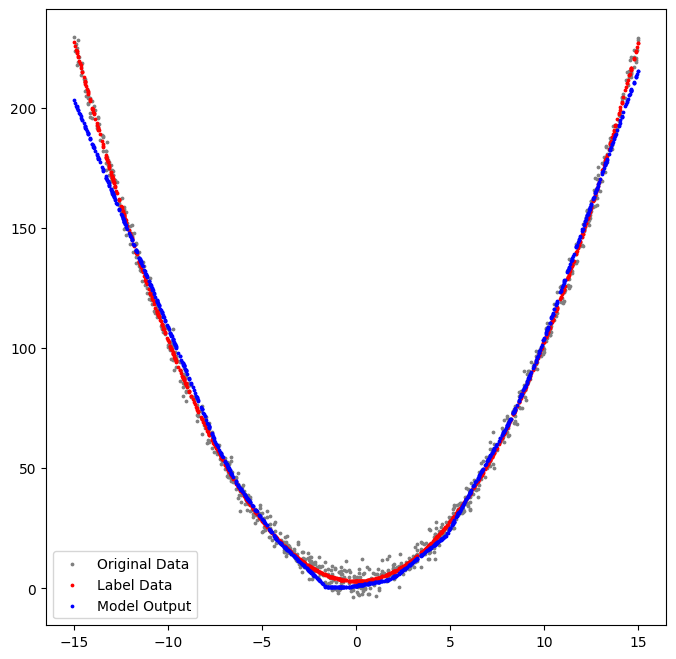

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(x.detach().numpy(),y_noise, s=3, c='grey', label="Original Data")
plt.scatter(x.detach().numpy(),y, s=3, c='red', label="Label Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(), s=3, c='blue',label="Model Output")
plt.legend()